In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [ ]:
#models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [ ]:
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
#Naive bayes
from sklearn.naive_bayes import GaussianNB
#Stacking
from mlxtend.classifier import StackingClassifier#

In [ ]:
from google.colab import files
train_df = pd.read_csv("/content/survey.csv")
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [ ]:
#data cleaning
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
Gender                         0  0.000000
Timestamp                      0  0.000000
Age                            0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
Country                        0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
wellness_program               0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
supervisor                     0  0.000000
coworkers  

In [ ]:
#dealing with missing data
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)
train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

Age  Gender         Country self_employed family_history treatment  \
0   37  Female   United States           NaN             No       Yes   
1   44       M   United States           NaN             No        No   
2   32    Male          Canada           NaN             No        No   
3   31    Male  United Kingdom           NaN            Yes       Yes   
4   31    Male   United States           NaN             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often            6-25          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely            6-25          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence  
0                Yes              No  
1         Don't know              No  
2                 No              No  
3                 No             Yes  
4         Don't know              No  

[5 rows x 24 columns]

In [ ]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0
# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']  # Define stringFeatures
floatFeatures = []
# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not identified.' % feature)
train_df.head()

Age  Gender         Country self_employed family_history treatment  \
0   37  Female   United States           NaN             No       Yes   
1   44       M   United States           NaN             No        No   
2   32    Male          Canada           NaN             No        No   
3   31    Male  United Kingdom           NaN            Yes       Yes   
4   31    Male   United States           NaN             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often            6-25          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely            6-25          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence  
0                Yes              No  
1         Don't know              No  
2                 No              No  
3                 No             Yes  
4         Don't know              No  

[5 rows x 24 columns]

In [ ]:
#Clean 'Gender'
gender = train_df['Gender'].unique()
print(gender)
#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]
print(train_df['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mai

In [ ]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
# Fill with media() values  120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s
#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


<ipython-input-13-2342d7b32f98>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace = True)


In [ ]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know')
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [ ]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():
    print(key, value)
#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(60), np.int64(61), np.int64(62), np.int64(65), np.int64(72)]
label_Gender ['Agender', 'All', 'Androgyne', 'Cis Female', 'Cis Male', 'Cis Man', 'Enby', 'F', 'Femake', 'Female', 'Female ', 'Female (cis)', 'Female (trans)', 'Genderqueer', 'Guy (-ish) ^_^', 'M', 'Mail', 'Make', 'Mal', 'Male', 'Male ', 'Male (CIS)', 'Male-ish', 'Malr', 'Man', 'Nah', 'Neuter', 'Trans woman', 'Trans-female', 'Woman', 'cis male', 'cis-female

Age  Gender  self_employed  family_history  treatment  work_interfere  \
0   19       9              0               0          1               2   
1   26      15              0               0          0               3   
2   14      19              0               0          0               3   
3   13      19              0               1          1               2   
4   13      19              0               0          0               1   

   no_employees  remote_work  tech_company  benefits  ...  leave  \
0             4            0             1         2  ...      2   
1             5            0             0         0  ...      0   
2             4            0             1         1  ...      1   
3             2            0             1         1  ...      1   
4             1            1             1         2  ...      0   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                          1                        1          1           2   
1                          0                        1          0           0   
2                          1                        1          2           2   
3                          2                        2          1           0   
4                          1                        1          1           2   

   mental_health_interview  phys_health_interview  mental_vs_physical  \
0                        1                      0                   2   
1                        1                      1                   0   
2                        2                      2                   1   
3                        0                      0                   1   
4                        2                      2                   0   

   obs_consequence  age_range  
0                0          2  
1                0          2  
2                0          2  
3                1          2  
4                0          2  

[5 rows x 24 columns]

In [ ]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
mental_vs_physical             0      0.0
obs_consequence                0  

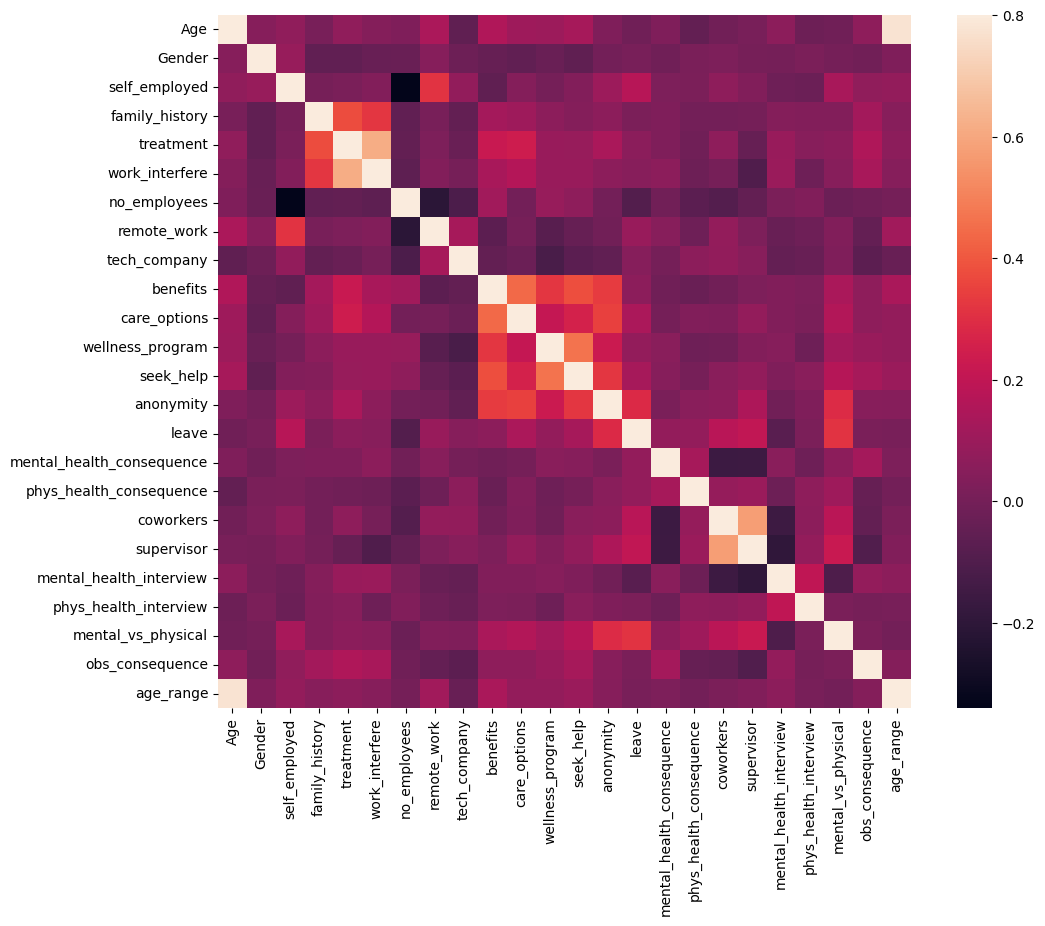

In [ ]:
#Variability comparison between categories of variables
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

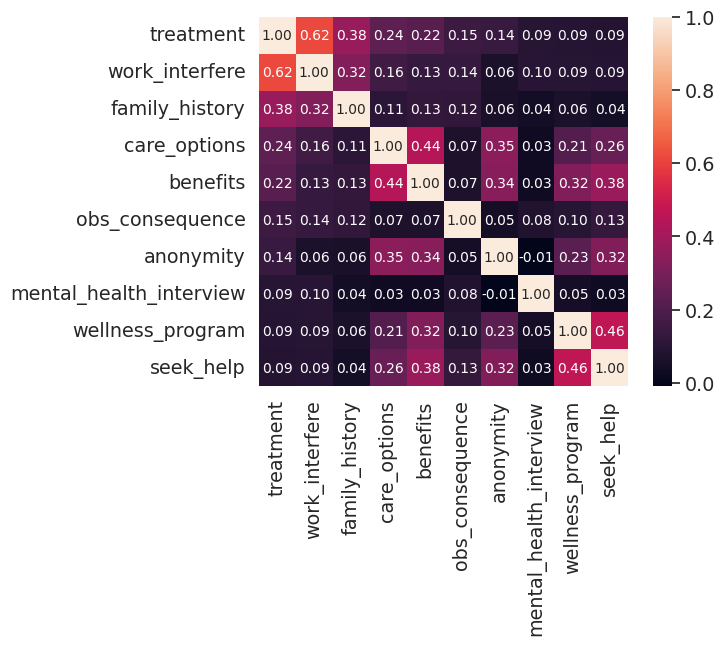

In [ ]:
k = 10
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<ipython-input-19-0883ce28c5c2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"], bins=24)


Text(0.5, 0, 'Age')

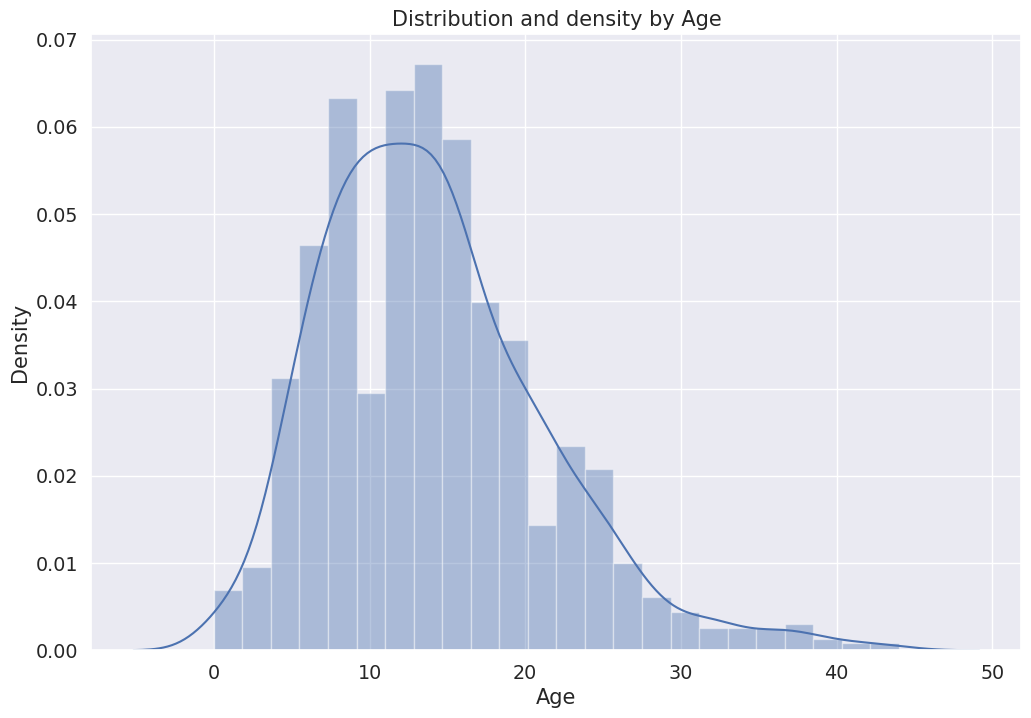

In [ ]:
#some Charts to see the Data Relationship
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")
#ext(0.5, 0, ‘Age’)

#Inference: The above plot shows the Age column with respect to density. We can see that density is higher from Age 10 to 20 years in our dataset.


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


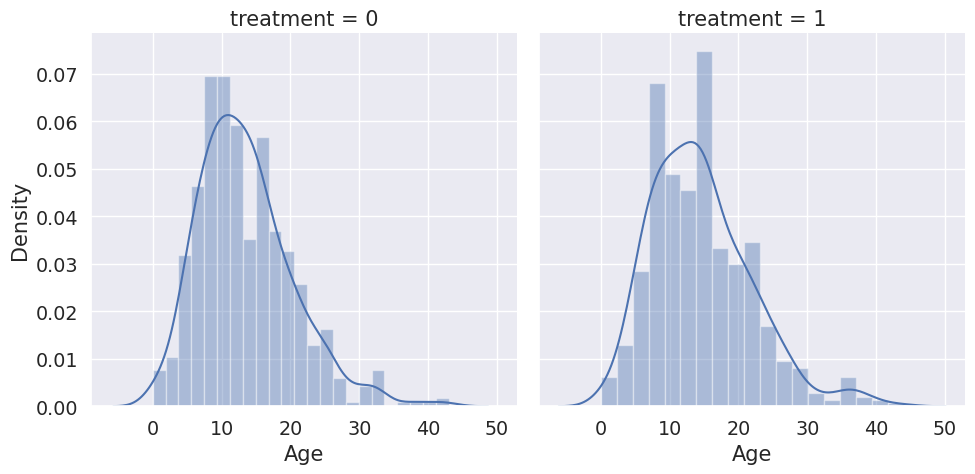

In [ ]:
j = sns.FacetGrid(train_df, col='treatment', height=5)
j = j.map(sns.distplot, "Age")


<ipython-input-21-00fa94e92ce7>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  j.set_xticklabels(labels)


Text(0.5, 1.0, 'Total Distribution by treated or not')

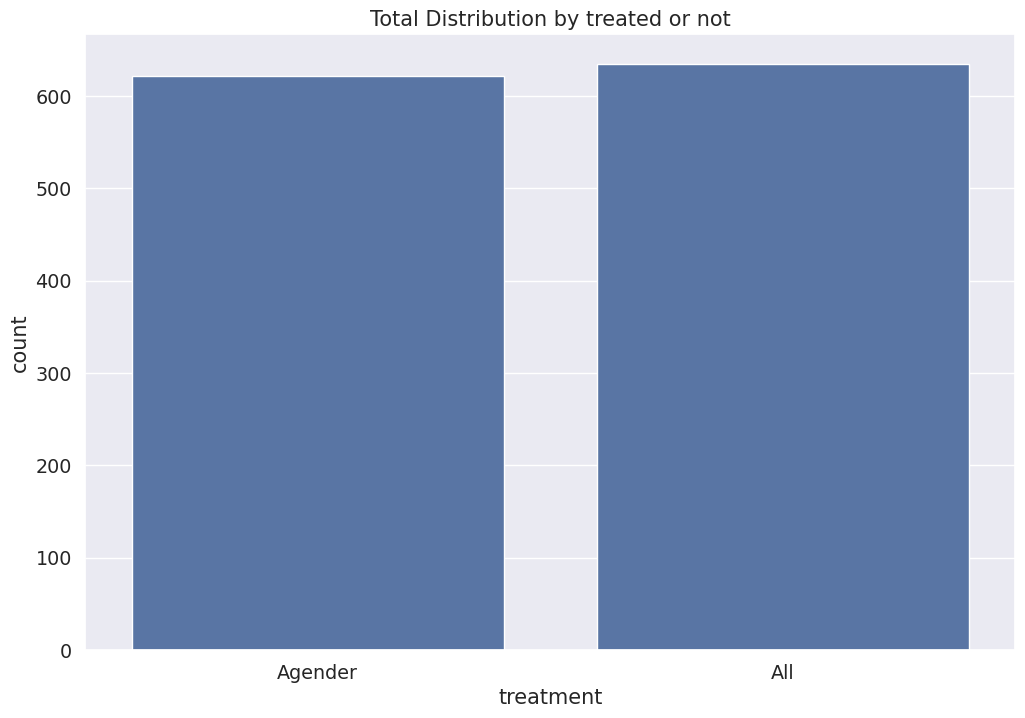

In [ ]:
#Inference: Treatment 0 means treatment is not necessary 1 means it is. First Barplot shows that from age 0 to 10-year treatment is not necessary and is needed after 15 years.
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
j = sns.countplot(x="treatment", data=train_df)
j.set_xticklabels(labels)
plt.title('Total Distribution by treated or not')
#Text(0.5, 1.0, ‘Total Distribution by treated or not’)

<ipython-input-22-51e559684870>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)


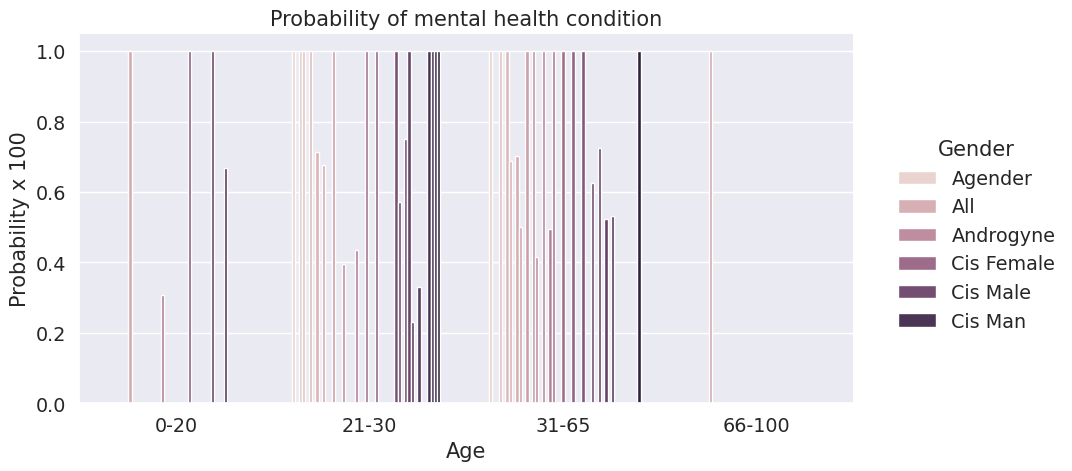

In [ ]:
#Inference: Here we can see that more males are treated as compared to females in the dataset.
o = labelDict['label_age_range']
j = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()
#Inference: This barplot shows the mental health of females, males, and transgender according to different age groups. we can analyze that from the age group of 66 to 100, mental health is very high in females as compared to another gender. And from age 21 to 64, mental health is very high in transgender as compared to males.

<ipython-input-24-ea05605c218a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(


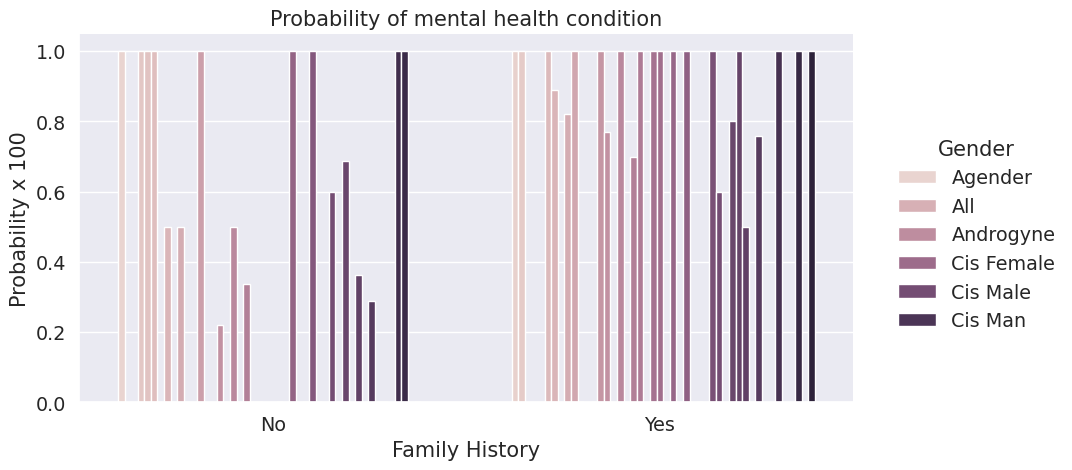

In [ ]:
o = labelDict['label_family_history']

j = sns.catplot(
    x="family_history",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    ci=None,
    height=5,
    aspect=2,
    legend_out=True
)

j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

new_labels = labelDict['label_Gender']

# Use `j` instead of `g`
for t, l in zip(j._legend.texts, new_labels):
    t.set_text(l)

j.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


In [ ]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

Age  Gender  self_employed  family_history  treatment  work_interfere  \
0  0.431818       9              0               0          1               2   
1  0.590909      15              0               0          0               3   
2  0.318182      19              0               0          0               3   
3  0.295455      19              0               1          1               2   
4  0.295455      19              0               0          0               1   

   no_employees  remote_work  tech_company  benefits  ...  leave  \
0             4            0             1         2  ...      2   
1             5            0             0         0  ...      0   
2             4            0             1         1  ...      1   
3             2            0             1         1  ...      1   
4             1            1             1         2  ...      0   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                          1                        1          1           2   
1                          0                        1          0           0   
2                          1                        1          2           2   
3                          2                        2          1           0   
4                          1                        1          1           2   

   mental_health_interview  phys_health_interview  mental_vs_physical  \
0                        1                      0                   2   
1                        1                      1                   0   
2                        2                      2                   1   
3                        0                      0                   1   
4                        2                      2                   0   

   obs_consequence  age_range  
0                0          2  
1                0          2  
2                0          2  
3                1          2  
4                0          2  

[5 rows x 24 columns]

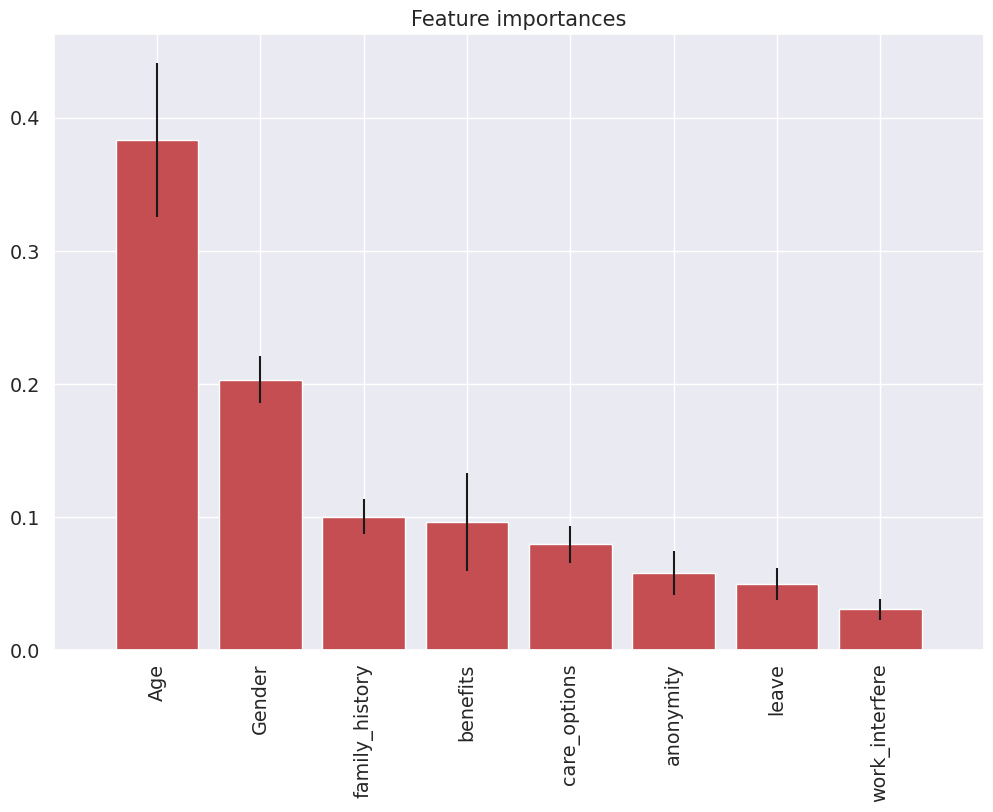

In [ ]:
# all your previous code remains same...

plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")

# Corrected line (small x)
plt.xticks(range(X.shape[1]), labels, rotation='vertical')

plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
#Tuning
def evalClassModel(model, y_test1, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test1, y_pred_class))
    print('Null accuracy:n', y_test1.value_counts())
    # calculate the percentage of ones
    print('Percentage of ones:', y_test1.mean())
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test1.mean())
    print('True:', y_test1.values[0:25])
    print('Pred:', y_pred_class[0:25])
    #Confusion matrix
    confusion = metrics.confusion_matrix(y_test1, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    accuracy = metrics.accuracy_score(y_test1, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test1, y_pred_class))
    fp_rate = FP / float(TN + FP)
    print('False Positive Rate:', fp_rate)
    print('Precision:', metrics.precision_score(y_test1, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test1, y_pred_class))
    # calculate cross-validated AUC
    print('Crossvalidated AUC values:', cross_val_score1(model, X, y, cv=10, scoring='roc_auc').mean())
    print('First 10 predicted responses:n', model.predict(X_test1)[0:10])
    print('First 10 predicted probabilities of class members:n', model.predict_proba(X_test1)[0:10])
    model.predict_proba(X_test1)[0:10, 1]
    y_pred_prob = model.predict_proba(X_test1)[:, 1]
    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)

        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    print('First 10 predicted probabilities:n', y_pred_prob[0:10])
    roc_auc = metrics.roc_auc_score(y_test1, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred_prob)
    if plot == True:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    def evaluate_threshold(threshold):

        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test1, predict_mine)
    print(confusion)
    return accuracy

In [ ]:
#Tuning with cross-validation score

def tuningCV(knn):
    k_Range = list(Range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score1(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    plt.plot(k_Range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [ ]:
#Tuning with cross-validation score

def tuningCV(knn):
    k_Range = list(Range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score1(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    plt.plot(k_Range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
#Tuning with GridSearchCV

def tuningGridSerach(knn):

    k_Range = list(range(1, 31))
    print(k_Range)

    param_grid = dict(n_neighbors=k_range)
    print(param_grid)

    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    grid.fit(X, y)
    grid.grid_scores1_

    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    grid_mean_scores1 = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores1)
    # plot the results
    plt.plot(k_Range, grid_mean_scores1)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [ ]:
#Tuning with RandomizedSearchCV

def tuningRandomizedSearchCV(model, param_dist):

    rand1 = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state1=5)
    rand1.fit(X, y)
    rand1.cv_results_

    print('Rand1. Best Score: ', rand.best_score_)
    print('Rand1. Best Params: ', rand.best_params_)

    best_scores = []
    for _ in Range(20):
        rand1 = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand1.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [ ]:
#Tuning by searching multiple parameters simultaneously

def tuningMultParam(knn):

    k_Range = list(Range(1, 31))
    weight_options = ['uniform', 'distance']

    param_grid = dict(N_neighbors=k_range, weights=weight_options)
    print(param_grid)

    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)

    print(grid.grid_scores_)

    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

In [ ]:
from sklearn.model_selection import cross_val_score  # Make sure this import is present

def evalClassModel(model, y_test1, y_pred_class, plot):
    print('Accuracy:', metrics.accuracy_score(y_test1, y_pred_class))
    print('Confusion Matrix:\n', metrics.confusion_matrix(y_test1, y_pred_class))
    print('Classification Report:\n', metrics.classification_report(y_test1, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test1, y_pred_class))

    # corrected line here:
    print('Crossvalidated AUC values:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    print('First 10 predicted responses:\n', model.predict(X_test1)[0:10])
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test1)[0:10])

    if plot:
        metrics.plot_roc_curve(model, X_test1, y_test1)
        plt.show()

    return metrics.accuracy_score(y_test1, y_pred_class)


In [ ]:
def evalClassModel(model, y_test1, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test1, y_pred_class))
    print('Null accuracy:n', y_test1.value_counts())
    # calculate the percentage of ones
    print('Percentage of ones:', y_test1.mean())
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test1.mean())
    print('True:', y_test1.values[0:25])
    print('Pred:', y_pred_class[0:25])
    #Confusion matrix
    confusion = metrics.confusion_matrix(y_test1, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    accuracy = metrics.accuracy_score(y_test1, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test1, y_pred_class))
    fp_rate = FP / float(TN + FP)
    print('False Positive Rate:', fp_rate)
    print('Precision:', metrics.precision_score(y_test1, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test1, y_pred_class))
    # calculate cross-validated AUC
    # Changed cross_val_score1 to cross_val_score
    print('Crossvalidated AUC values:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    print('First 10 predicted responses:n', model.predict(X_test1)[0:10])
    print('First 10 predicted probabilities of class members:n', model.predict_proba(X_test1)[0:10])
    model.predict_proba(X_test1)[0:10, 1]
    y_pred_prob = model.predict_proba(X_test1)[:, 1]
    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)

        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    print('First 10 predicted probabilities:n', y_pred_prob[0:10])
    roc_auc = metrics.roc_auc_score(y_test1, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred_prob)
    if plot == True:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    def evaluate_threshold(threshold):

        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test1, predict_mine)
    print(confusion)
    return accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV  # make sure it's imported

def tuningRandomizedSearchCV(model, param_dist):
    rand1 = RandomizedSearchCV(
        model,
        param_distributions=param_dist,  # corrected argument name here
        cv=10,
        scoring='accuracy',
        n_iter=10,
        random_state=5   # fixed random_state here
    )
    rand1.fit(X, y)
    rand1.cv_results_


In [ ]:
#randdom forest
#decision tree


In [ ]:
#Logistic Regression

def logisticRegression():
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred_class = logreg.predict(X_test1)
    accuracy_score = evalClassModel(logreg, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['Log. Regression'] = accuracy_score * 100
logisticRegression(

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics

# Assume train_df is already loaded

# Step 1: Create X and y
feature_cols1 = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols1]
y = train_df.treatment

# Step 2: Split data into training and testing (Global)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=0)

# Step 3: Define empty methodDict
methodDict = {}

# Step 4: Define evalClassModel
def evalClassModel(model, y_test1, y_pred_class, plot=True):
    acc = accuracy_score(y_test1, y_pred_class)
    print('Accuracy:', acc)
    print('Confusion Matrix:\n', metrics.confusion_matrix(y_test1, y_pred_class))
    print('Classification Report:\n', metrics.classification_report(y_test1, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test1, y_pred_class))
    return acc

# Step 5: Define Boosting function
def boosting():
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(estimator=clf, n_estimators=500, random_state=42)
    boost.fit(X_train1, y_train1)
    y_pred_class = boost.predict(X_test1)
    accuracy = evalClassModel(boost, y_test1, y_pred_class, True)
    methodDict['Boosting'] = accuracy * 100

# Step 6: Call boosting
boosting()


Accuracy: 0.8095238095238095
Confusion Matrix:
 [[130  61]
 [ 11 176]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78       191
           1       0.74      0.94      0.83       187

    accuracy                           0.81       378
   macro avg       0.83      0.81      0.81       378
weighted avg       0.83      0.81      0.81       378

AUC Score: 0.8109023714197721


In [ ]:
#neural network

In [ ]:
#Predicting with Neural Network
#Create input function

%tensorflow_version 2.x
import tensorflow as tf
import argparse
from sklearn.model_selection import train_test_split

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!pip install tensorflow
%tensorflow_version 2.x
import tensorflow as tf
import argparse
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Previous code to define and process train_df should be here

train_df = pd.read_csv('/content/survey.csv')
# Define X and y before using them in train_test_split
feature_cols1 = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols1]
y = train_df.treatment

batch_size = 100
train_steps = 1000
# Changed train_test1_split to train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=0)

# ... (rest of the code)
batch_size = 100
train_steps = 1000
# Changed train_test1_split to train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=0)
def train_input_fn(features, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    return dataset.shuffle(1000).repeat().batch(batch_size)
def eval_input_fn(features, labels, batch_size):
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    dataset = dataset.batch(batch_size)
    # Return the dataset.
    return dataset

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_column = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
model.train(input_fn=lambda:train_input_fn(X_train1, y_train1, batch_size), steps=train_steps)

In [ ]:
# Evaluate the model.
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test1, y_test1, batch_size))
print('nTest set accuracy: {accuracy:0.2f}n'.format(**eval_result))
#Data for final graph
accuracy = eval_result['accuracy'] * 100
methodDict['Neural Network'] = accuracy

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier

# 1. Encode all string columns into numbers
X_encoded = X.copy()
y_encoded = y.copy()

# Apply Label Encoding
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

if y_encoded.dtype == 'object':
    le_y = LabelEncoder()
    y_encoded = le_y.fit_transform(y_encoded)

# 2. Handle any missing values again if needed
X_encoded = X_encoded.fillna(X_encoded.mode().iloc[0])
# y_encoded is usually clean after encoding

# 3. Train AdaBoost model
clf = AdaBoostClassifier()
clf.fit(X_encoded, y_encoded)

# 4. Predict on test data
# (Assuming X_test1 also needs encoding the same way)
X_test_encoded = X_test1.copy()
for col in X_test_encoded.columns:
    if X_test_encoded[col].dtype == 'object':
        le = LabelEncoder()
        X_test_encoded[col] = le.fit_transform(X_test_encoded[col])

X_test_encoded = X_test_encoded.fillna(X_test_encoded.mode().iloc[0])

dfTestPredictions = clf.predict(X_test_encoded)

# 5. Prepare results
results = pd.DataFrame({'Index': X_test1.index, 'Treatment': dfTestPredictions})

# 6. Save to CSV
results.to_csv('results.csv', index=False)

# 7. View
results.head()

Index  Treatment
0      5          1
1    494          0
2     52          1
3    986          1
4    186          0

In [ ]:
results = pd.DataFrame({'Index': X_test1.index, 'Treatment': dfTestPredictions})
results